In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense

In [0]:
import os
from tensorflow.keras.utils import get_file

link = "https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip"
zip_file = get_file('cats_and_dogs_filtered.zip', link, extract=True)

base_dir, _ = os.path.splitext(zip_file)
base_dir

'/root/.keras/datasets/cats_and_dogs_filtered'

In [0]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
print ('Total training cat images:', len(os.listdir(train_cats_dir)))

Total training cat images: 1000


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 160
batch_size = 32

train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_dataset = train_data.flow_from_directory(
    train_dir, target_size=(image_size, image_size),
    classes=['cats', 'dogs'],
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [0]:
image_size = 160
batch_size = 32

test_data = ImageDataGenerator(
    rescale=1./255)

test_dataset = train_data.flow_from_directory(
    validation_dir, target_size=(image_size, image_size),
    classes=['cats', 'dogs'],
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
images, labels = test_dataset.next()

In [0]:
data = images[0]

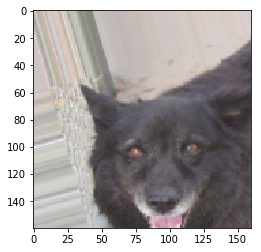

In [0]:
plt.imshow(data)

In [0]:
classes=['cats', 'dogs']

In [0]:
int(labels[0])

1

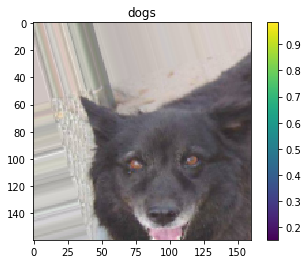

In [0]:
plt.imshow(data)
plt.title(classes[int(labels[0])])
plt.colorbar()

In [0]:
from tensorflow.keras import applications

IMG_SHAPE = (image_size, image_size, 3)

base_model = applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
9412608/9406464 [==============================] - 1s 0us/step


In [0]:
base_model.count_params()

2257984

In [0]:
base_model.trainable = False

In [0]:
model = tf.keras.Sequential([
  base_model,
  Flatten(),
  Dense(128, activation='relu'),
  Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 32000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4096128   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 6,354,241
Trainable params: 4,096,257
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.count_params()

6354241

In [0]:
optim = tf.keras.optimizers.Adam(learning_rate=0.003)
loss = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=optim, loss=loss, metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
len(model.trainable_variables)

4

In [0]:
history = model.fit(train_dataset, epochs=5, workers=4, validation_data=test_dataset)

Epoch 1/5
63/63 [==============================] - 32s 500ms/step - loss: 1.7798 - acc: 0.8395 - val_loss: 0.6097 - val_acc: 0.8660
Epoch 2/5
63/63 [==============================] - 25s 395ms/step - loss: 0.3052 - acc: 0.8910 - val_loss: 0.3180 - val_acc: 0.8750
Epoch 3/5
63/63 [==============================] - 24s 379ms/step - loss: 0.2010 - acc: 0.9215 - val_loss: 0.2792 - val_acc: 0.8970
Epoch 4/5
63/63 [==============================] - 24s 380ms/step - loss: 0.1902 - acc: 0.9205 - val_loss: 0.4773 - val_acc: 0.8610
Epoch 5/5
63/63 [==============================] - 24s 378ms/step - loss: 0.1909 - acc: 0.9195 - val_loss: 0.3095 - val_acc: 0.8920


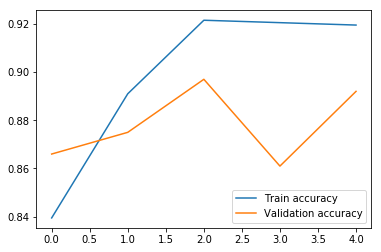

In [0]:
from matplotlib import pyplot as plt

acc = history.history['acc']
val = history.history['val_acc']

plt.plot(acc, label='Train accuracy')
plt.plot(val, label='Validation accuracy')
plt.legend(loc='lower right')

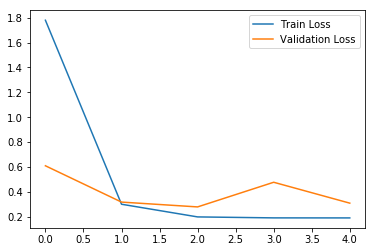

In [0]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')

# Fine tuning

In [0]:
base_model.trainable = True

In [0]:
len(base_model.layers)

155

In [0]:
for layer in base_model.layers[:100]:
  layer.trainable = False

In [0]:
model = tf.keras.Sequential([
  base_model,
  Flatten(),
  Dense(128, activation='relu'),
  Dense(2, activation='softmax')
])

In [0]:
len(model.trainable_variables)

60

In [0]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer = optim,
              loss=loss,
              metrics=['accuracy'])

In [0]:
history = model.fit(train_dataset, epochs=10, workers=4, validation_data=test_dataset)

Epoch 1/10
63/63 [==============================] - 32s 510ms/step - loss: 2.5405 - acc: 0.7120 - val_loss: 1.6262 - val_acc: 0.5000
Epoch 2/10
63/63 [==============================] - 25s 396ms/step - loss: 0.4027 - acc: 0.8310 - val_loss: 1.0376 - val_acc: 0.5010
Epoch 3/10
63/63 [==============================] - 25s 389ms/step - loss: 0.3201 - acc: 0.8725 - val_loss: 3.1726 - val_acc: 0.5000
Epoch 4/10
35/63 [===============>..............] - ETA: 5s - loss: 0.2406 - acc: 0.9054

KeyboardInterrupt: ignored

In [0]:
img, labels = train_dataset.next()

In [0]:
img.shape

(32, 160, 160, 3)

In [0]:
out = model(img)

In [0]:
out

<tf.Tensor 'sequential_1/dense_3/Softmax:0' shape=(32, 2) dtype=float32>

In [0]:
import numpy as np
np.argmax(out)

0

In [0]:
img1 = img[0]

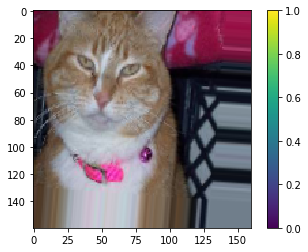

In [0]:
plt.imshow(img1)
plt.colorbar()
plt.